<a href="https://colab.research.google.com/github/tranthip/Capston_project/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import numpy as np
data=pd.read_csv("/content/one_house.csv")
data.head()

,Unnamed: 0,datetime,LCLid,energy(kWh/hh),scheduling,acorn,apparentTemperature,humidity,windSpeed
0,0,2013-01-01 00:00:00,MAC000002,0.219,1,1,3.66,0.73,5.46
1,1,2013-01-01 01:00:00,MAC000002,0.191,1,1,4.24,0.72,5.51
2,2,2013-01-01 02:00:00,MAC000002,0.182,1,1,3.74,0.68,5.74
3,3,2013-01-01 03:00:00,MAC000002,0.194,1,1,3.89,0.68,4.98
4,4,2013-01-01 04:00:00,MAC000002,0.122,1,1,3.34,0.73,4.20


In [132]:
dataset=data[["scheduling","acorn","apparentTemperature","humidity","windSpeed","energy(kWh/hh)"]]
dataset.head()

,scheduling,acorn,apparentTemperature,humidity,windSpeed,energy(kWh/hh)
0,1,1,3.66,0.73,5.46,0.219
1,1,1,4.24,0.72,5.51,0.191
2,1,1,3.74,0.68,5.74,0.182
3,1,1,3.89,0.68,4.98,0.194
4,1,1,3.34,0.73,4.20,0.122


In [133]:
dataset.describe()

,scheduling,acorn,apparentTemperature,humidity,windSpeed,energy(kWh/hh)
count,17520.000000,17520.0,17516.000000,17516.000000,17516.000000,17520.000000
mean,0.306849,1.0,9.574034,0.766571,3.838876,0.245109
std,0.461199,0.0,7.732808,0.146389,2.024025,0.250377
min,0.000000,1.0,-8.880000,0.230000,0.040000,0.065000
25%,0.000000,1.0,3.350000,0.680000,2.330000,0.110000
50%,0.000000,1.0,10.420000,0.800000,3.640000,0.150000
75%,1.000000,1.0,15.570000,0.880000,5.010000,0.262000
max,1.000000,1.0,32.420000,1.000000,14.560000,2.994000


In [0]:
dataset=dataset.dropna()


In [136]:
X=dataset.values[:,:5]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
y=dataset.values[:,-1]
print(X.shape)
print(y.shape)

(17516, 5)
(17516,)


In [137]:
def split_data(X,y,n_step):
  X_ls=list()
  y_ls=list()
  for i in range(X.shape[0]):
    if (i+n_step+1)<X.shape[0]:
      X_wind=X[i:i+n_step,:]
      y_wind=y[i+n_step+1]
      X_ls.append(X_wind)
      y_ls.append(y_wind)
    else:
      break
  X_3D=np.array(X_ls)
  y_2D=np.array(y_ls)
  return X_3D,y_2D
n_step=24
X_split,y_split=split_data(X,y,n_step)
print(X_split.shape)
print(y_split.shape)

(17491, 24, 5)
(17491,)


In [138]:
# model MLP 1
from sklearn.model_selection import train_test_split
X_3D=X_split.reshape(X_split.shape[0],X_split.shape[1]*X_split.shape[2])
print(X_3D.shape)
X_train, X_test, y_train, y_test = train_test_split(X_3D, y_split, test_size=0.10, random_state=42)
print(len(X_train))
print(len(X_test))
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history=model.fit(X_train, y_train, batch_size= 30, epochs=100, validation_data=(X_test,y_test))

(17491, 120)
15741
1750
Train on 15741 samples, validate on 1750 samples
Epoch 1/100
15741/15741 [==============================] - 1s 82us/step - loss: 0.0755 - mean_squared_error: 0.0755 - mean_absolute_error: 0.1923 - mean_absolute_percentage_error: 106.5285 - val_loss: 0.0643 - val_mean_squared_error: 0.0643 - val_mean_absolute_error: 0.1750 - val_mean_absolute_percentage_error: 97.8224
Epoch 2/100
15741/15741 [==============================] - 1s 45us/step - loss: 0.0584 - mean_squared_error: 0.0584 - mean_absolute_error: 0.1644 - mean_absolute_percentage_error: 88.5911 - val_loss: 0.0572 - val_mean_squared_error: 0.0572 - val_mean_absolute_error: 0.1607 - val_mean_absolute_percentage_error: 88.0327
Epoch 3/100
15741/15741 [==============================] - 1s 45us/step - loss: 0.0545 - mean_squared_error: 0.0545 - mean_absolute_error: 0.1548 - mean_absolute_percentage_error: 81.9747 - val_loss: 0.0565 - val_mean_squared_error: 0.0565 - val_mean_absolute_error: 0.1465 - val_mean_a

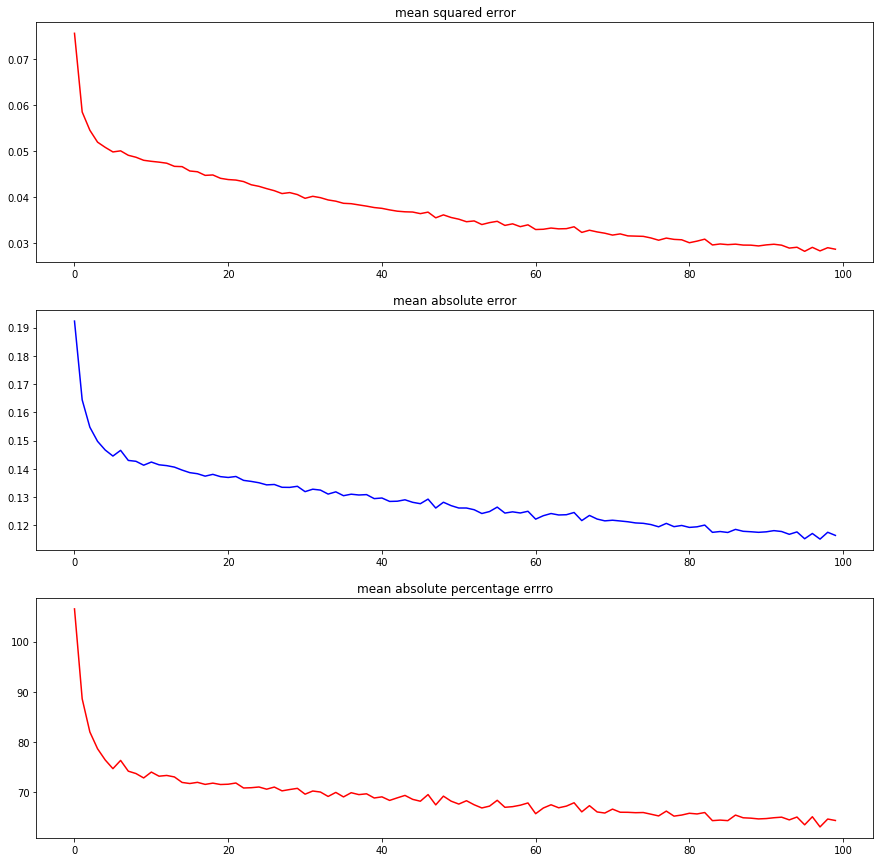

In [139]:
# fit model
fig, axs = plt.subplots(3,figsize=(15,15))
axs[0].plot(history.history['mean_squared_error'],'r')
axs[0].set_title("mean squared error")
axs[1].plot(history.history['mean_absolute_error'],'b')
axs[1].set_title("mean absolute error")
axs[2].plot(history.history['mean_absolute_percentage_error'],'r')
axs[2].set_title("mean absolute percentage errro")
plt.show()

In [140]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 101       
Total params: 12,201
Trainable params: 12,201
Non-trainable params: 0
_________________________________________________________________


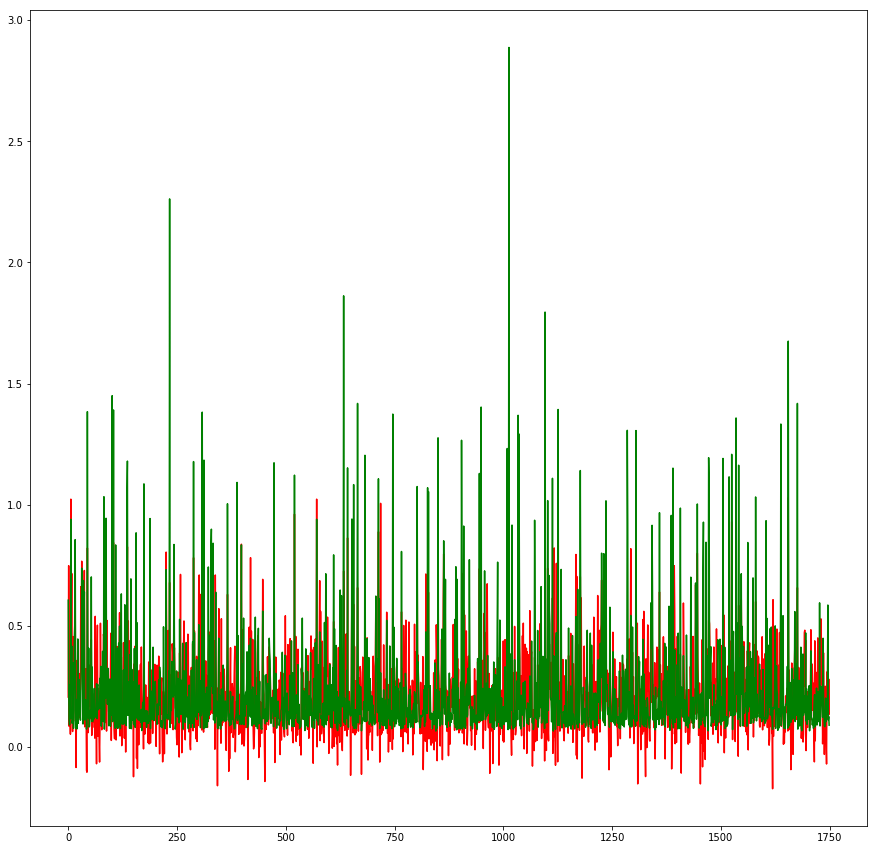

In [141]:
y_pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
x=range(len(y_pred))
plt.plot(x,y_pred,'r')
plt.plot(x,y_test,'g')

In [142]:
# model MLP 2
from keras.layers import Input
from keras.layers import Dense
from keras.layers.merge import concatenate
from keras.models import Model
X_split,y_split=split_data(X,y,n_step)
X_train, X_test, y_train, y_test = train_test_split(X_split, y_split, test_size=0.10, random_state=42)
X1_train=X_train[:,:,0]
X2_train=X_train[:,:,1]
X3_train=X_train[:,:,2]
X4_train=X_train[:,:,3]
X5_train=X_train[:,:,4]
X1_test=X_test[:,:,0]
X2_test=X_test[:,:,1]
X3_test=X_test[:,:,2]
X4_test=X_test[:,:,3]
X5_test=X_test[:,:,4]



visible1 = Input(shape=(n_step,))
dense1 = Dense(100, activation='relu')(visible1)
visible2 = Input(shape=(n_step,))
dense2 = Dense(100, activation='relu')(visible2)
visible3 = Input(shape=(n_step,))
dense3 = Dense(100, activation='relu')(visible3)
visible4 = Input(shape=(n_step,))
dense4 = Dense(100, activation='relu')(visible4)
visible5 = Input(shape=(n_step,))
dense5 = Dense(100, activation='relu')(visible5)
# merge input models
merge = concatenate([dense1, dense2,dense3,dense4,dense5])
output = Dense(1)(merge)
model = Model(inputs=[visible1, visible2,visible3,visible4,visible5], outputs=output)
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history=model.fit([X1_train,X2_train,X3_train,X4_train,X5_train], y_train, batch_size= 30, epochs=100, validation_data=([X1_test,X2_test,X3_test,X4_test,X5_test],y_test))

Train on 15741 samples, validate on 1750 samples
Epoch 1/100
15741/15741 [==============================] - 2s 107us/step - loss: 0.0655 - mean_squared_error: 0.0655 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 92.5320 - val_loss: 0.0582 - val_mean_squared_error: 0.0582 - val_mean_absolute_error: 0.1621 - val_mean_absolute_percentage_error: 91.8359
Epoch 2/100
15741/15741 [==============================] - 1s 59us/step - loss: 0.0576 - mean_squared_error: 0.0576 - mean_absolute_error: 0.1573 - mean_absolute_percentage_error: 82.5393 - val_loss: 0.0575 - val_mean_squared_error: 0.0575 - val_mean_absolute_error: 0.1457 - val_mean_absolute_percentage_error: 73.7945
Epoch 3/100
15741/15741 [==============================] - 1s 55us/step - loss: 0.0562 - mean_squared_error: 0.0562 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 80.5288 - val_loss: 0.0570 - val_mean_squared_error: 0.0570 - val_mean_absolute_error: 0.1594 - val_mean_absolute_percentage_error

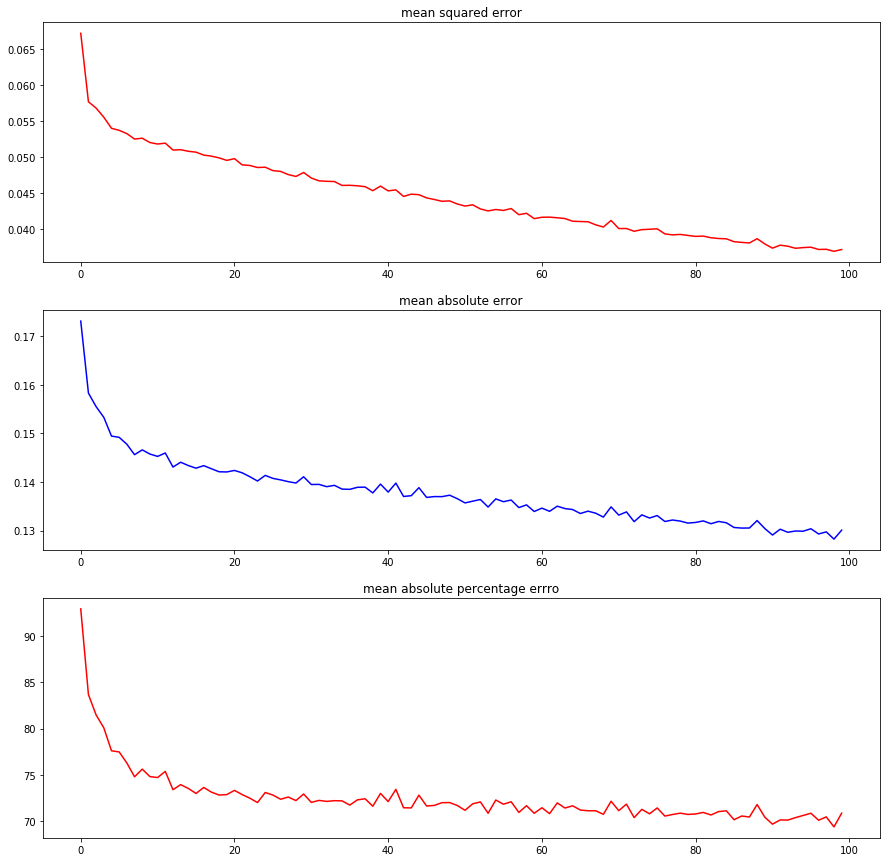

In [125]:
# fit model
fig, axs = plt.subplots(3,figsize=(15,15))
axs[0].plot(history.history['mean_squared_error'],'r')
axs[0].set_title("mean squared error")
axs[1].plot(history.history['mean_absolute_error'],'b')
axs[1].set_title("mean absolute error")
axs[2].plot(history.history['mean_absolute_percentage_error'],'r')
axs[2].set_title("mean absolute percentage errro")
plt.show()

In [126]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 24)           0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 24)           0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 24)           0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 24)           0                                            
____________________________________________________________________________________________

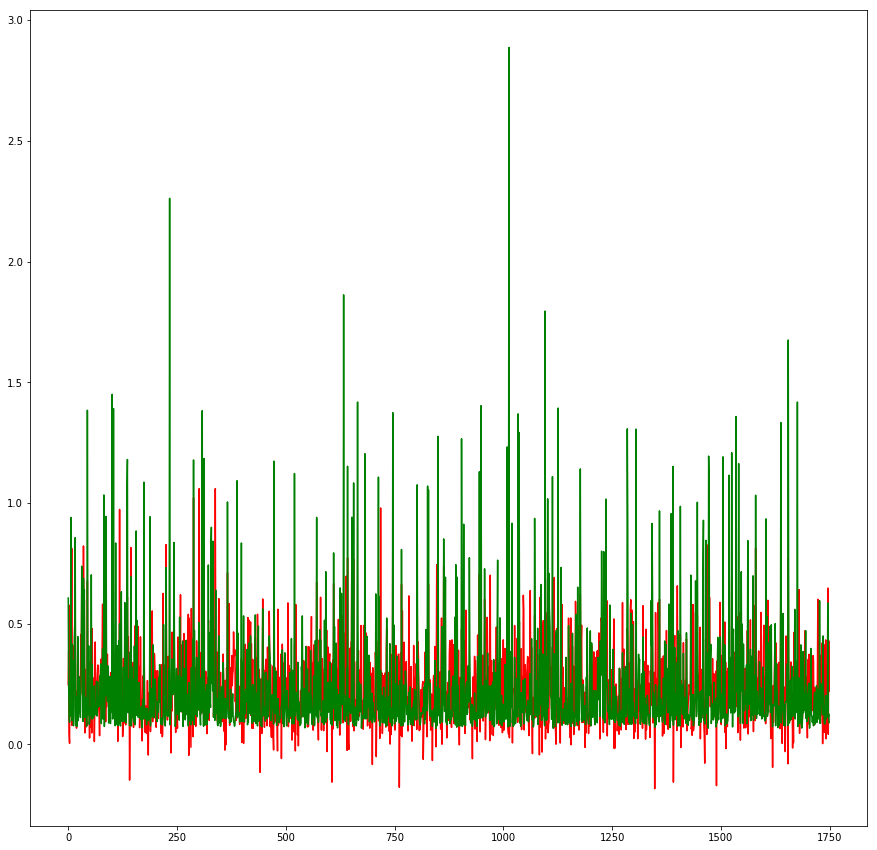

In [143]:
y_pred=model.predict([X1_test,X2_test,X3_test,X4_test,X5_test])
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
x=range(len(y_pred))
plt.plot(x,y_pred,'r')
plt.plot(x,y_test,'g')

In [144]:
# deep MLP
from sklearn.model_selection import train_test_split
X_3D=X_split.reshape(X_split.shape[0],X_split.shape[1]*X_split.shape[2])
print(X_3D.shape)
X_train, X_test, y_train, y_test = train_test_split(X_3D, y_split, test_size=0.10, random_state=42)
print(len(X_train))
print(len(X_test))
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape'])
history=model.fit(X_train, y_train, batch_size= 30, epochs=100, validation_data=(X_test,y_test))

(17491, 120)
15741
1750
Train on 15741 samples, validate on 1750 samples
Epoch 1/100
15741/15741 [==============================] - 2s 99us/step - loss: 0.0617 - mean_squared_error: 0.0617 - mean_absolute_error: 0.1529 - mean_absolute_percentage_error: 76.8505 - val_loss: 0.0541 - val_mean_squared_error: 0.0541 - val_mean_absolute_error: 0.1400 - val_mean_absolute_percentage_error: 72.9818
Epoch 2/100
15741/15741 [==============================] - 1s 49us/step - loss: 0.0525 - mean_squared_error: 0.0525 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 69.1601 - val_loss: 0.0552 - val_mean_squared_error: 0.0552 - val_mean_absolute_error: 0.1467 - val_mean_absolute_percentage_error: 79.8431
Epoch 3/100
15741/15741 [==============================] - 1s 48us/step - loss: 0.0499 - mean_squared_error: 0.0499 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 67.1098 - val_loss: 0.0515 - val_mean_squared_error: 0.0515 - val_mean_absolute_error: 0.1246 - val_mean_ab

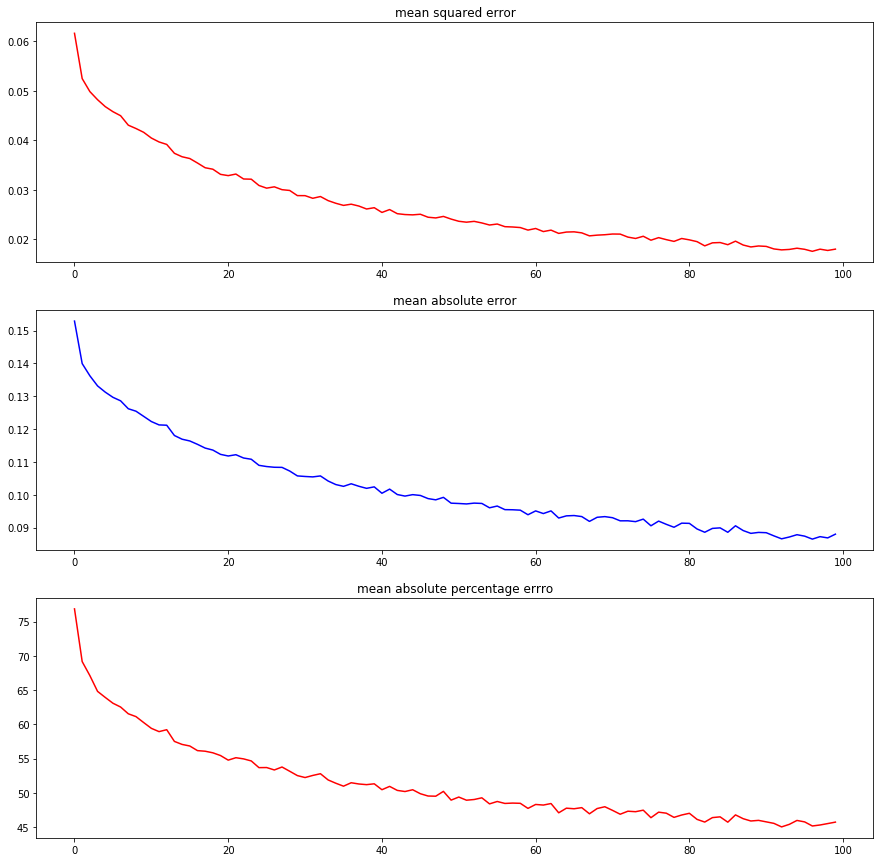

In [145]:
# fit model
fig, axs = plt.subplots(3,figsize=(15,15))
axs[0].plot(history.history['mean_squared_error'],'r')
axs[0].set_title("mean squared error")
axs[1].plot(history.history['mean_absolute_error'],'b')
axs[1].set_title("mean absolute error")
axs[2].plot(history.history['mean_absolute_percentage_error'],'r')
axs[2].set_title("mean absolute percentage errro")
plt.show()

In [146]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 11        
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
_________________________________________________________________


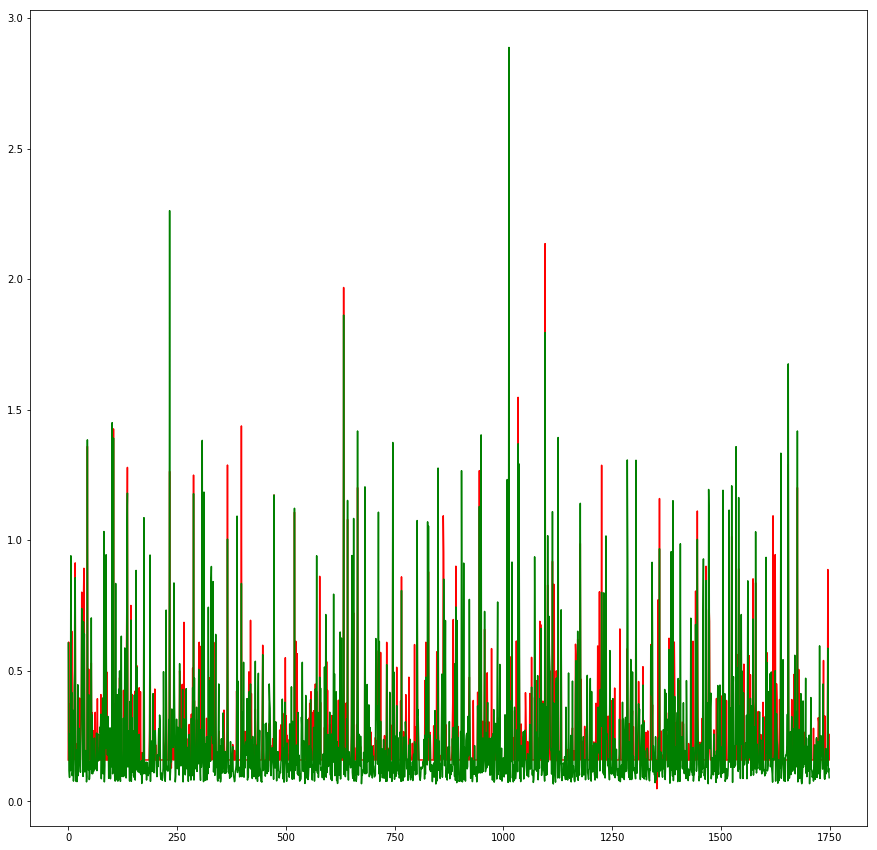

In [147]:
y_pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
x=range(len(y_pred))
plt.plot(x,y_pred,'r')
plt.plot(x,y_test,'g')